# Python for Data Science & Analysis 
## Notes 3.1, Introduction to Pandas

## Objectives
* import pandas
* write a program which uses pandas to
    * construct a dataframe via reading a dataset
    * remove missing data
    * obtain a subset of columns using list indexes

## What are the python data science and analysis libraries?

* NumPy
    * fast lists ( aka. arrays)
* Pandas
    * provides single-machine dataframes (aka. tables)
* Seaborn & matplotlib
    * visualization
    
    
* Spark
    * query over distributed file systems 
* plotly
    * interactive visuals
* scipy, sklearn, tensorflow, pytorch, statsmodels
    * scientific & statistical programming
* Aside:
    * NB. sqlite3 is written in C

## Why do we *need* to use them?

Python is very very very slow & memory inefficient

In [1]:
from random import random


In [2]:
dataset = []

for _ in range(1_000_000):
    dataset.append(random())
    

In [3]:
%%timeit
   
total = 0

for x in dataset:
    total += x

22.2 ms ± 127 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
import numpy as np


In [5]:
ds = np.random.uniform(0, 1, 1_000_000)


In [6]:
%%timeit

ds.sum()


449 µs ± 18.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
22E-3 / 500E-6 

44.0

Note here the python `for` loop is *44x* slower than the equivalent `.sum()` using `numpy`. 

## How do these other libraries beat python?

They aren't python... they are written in FORTRAN and C. So when you call `.sum()` you are *NOT* running `python` code, by mostly FORTRAN code. 

If you use python keywords (eg., `for`) your program will be very slow. These libraries are not *written in python*, they are compiled from other languages and are "available" from python. 

### Python is very very very slow & memory inefficient

Python uses $10\%$ more memory:

In [7]:
import sys
100 * round(1 -  ds.nbytes / sys.getsizeof(dataset), 1)


10.0

And `NumPy` is, here, $10$x faster... (often much more than this...)

In [8]:
#     3.7 ms / 404 µs
round(3.7E-3/404E-6, 1)


9.2

# Part 1a: Introduction to Pandas

## What is Pandas for?

Pandas uses fast FORTRAN and C code to **provide table-like querying and processing in python**. 

Pandas is a **fast, powerful, flexible** and easy to use open source **data analysis and manipulation tool**.

ref: https://pandas.pydata.org/

## When should I use pandas (vs., spark, dask, etc.)?

Pandas is for single-machine exploratory data investigation (& analytical processing). It is useful and performant when dealing with medium-sized datasets (ie., < RAM-of-Machine). 

Spark (and distributed libraries) is for programmatic data manipulation (eg., data engineering pipelines) and analytical investigation "at large scale". 

Even if you have a spark install, it is typically best to use pandas for the exploratory phase; and move to spark when requiring the relevant queries to run over massive datasets.

## How should I quickly explore data?

If you have a big distributed system (eg., spark) -- or a massive amount of data -- you can get very far by taking a smaller random sample and working with this sample on a single machine. 

Eg., 2 TB dataset in spark -> sample 1 GB of rows at random -> csv file

Then just work with the csv file, until you've produced your analysis, then run on all data.

## How do I import Pandas?

In [8]:
import pandas as pd

...in python, most data analysis libraries are imported and **renamed to enable abbreviated code**....

## How does pandas provide SQL-like operations in python?

##### Aside: this code obtains the titanic csv for this notebook

In [13]:
from pathlib import Path
import seaborn as sns

if not Path('datasets/titanic.csv').exists():
    print("please place the titanic csv in the datasets folder")
    sns.load_dataset('titanic').to_csv('titanic.csv', index=False)

(demo)

In [8]:
ti = pd.read_csv('datasets/titanic.csv')
ti


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


* `SELECT mean(survived), class FROM df GROUP BY class`
* Give me the rates of survival, on the titanic, by class:

In [13]:
ti['survived'].groupby(ti['class']).mean()


class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

...this is just to provide a sense of the capabilities of pandas...

## Aside: What data structure does Pandas provide?

Pandas provides a *dataframe* which is a table, *stored*, in column-order.

Relational databases store data in row-order:

In [7]:
#      (ID, Age, Name), ...
db = [(1, 18, "Michael"), (2, 28, "Lucie"), (3, 30, "Chris")]


In software and data engineering application you typically want a subset of rows: 

In [8]:
db[0:2] # the first two rows


[(1, 18, 'Michael'), (2, 28, 'Lucie')]

In typical applications which use relational databases, tables have $<20$ columns; and we are typically including all columns and filtering on rows.

In analytical applications, you may have $>>20$ columns, and  you will often want subsets of them:

In [9]:
#      ID         Age            Name
df = [(1, 2, 3), (18, 28, 30), ("Michael", "Lucie", "Chris")]


The last two columns:

In [10]:
df[-2:]


[(18, 28, 30), ('Michael', 'Lucie', 'Chris')]

## Reading from a Database

Pandas can import data from a relational database:

##### Aside: this code saves the titanic csv in a relational database, for illustration

In [11]:
from pathlib import Path
import pandas as pd
import sqlite3

if not Path('titanic.db').exists():
    with sqlite3.connect('titanic.db') as db:
        pd.read_csv('datasets/titanic.csv').to_sql('titanic', db, index=False)

If we have a relational databases, eg., `titanic.db`, then below we can load directly into pandas, 

In [14]:
db = sqlite3.connect("titanic.db")

pd.read_sql_query("""
    SELECT * 
    FROM titanic
    WHERE age >= 40 AND survived = 1 AND class = "Third"
    
""", db)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,3,male,45.0,0,0,8.0500,S,Third,man,1,None,Southampton,yes,1
1,1,3,male,44.0,0,0,7.9250,S,Third,man,1,None,Southampton,yes,1
2,1,3,female,63.0,0,0,9.5875,S,Third,woman,0,None,Southampton,yes,1


# Part 1b: Using Pandas

## How do I show a sample of rows?

A random sample of rows:

In [9]:
ti.sample(3) # 3 random rows


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
378,0,3,male,20.0,0,0,4.0125,C,Third,man,True,NaN,Cherbourg,no,True
662,0,1,male,47.0,0,0,25.5875,S,First,man,True,E,Southampton,no,True


Head provides the first `n`:

In [15]:
ti.head(3) # first 3 rows


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


## Should I use Sample or  Head for exploration?

`.sample` provides a random sampling of rows, which is typically much more representative than `.head`

Use `.sample` to get a quick insight into what kinds of data a dataset contains. 

## How do I select columns?

In [35]:
dataset = {
    'Age': [18, 21, 33, 49],
    'Name': ["Michael", "Alice", "Eve", "Bob"]
}

dataset['Age']

[18, 21, 33, 49]

Pandas uses python's indexing syntax, columns are selected by name:

In [16]:
ti['age']


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

Unlike in python, you can select mulitple columns using a list of column names:

In [36]:
ti[ ['age', 'fare'] ] #var[ index ]   <- index = ['age', 'fare']


,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


...here we use the *list* `['age', 'fare']` as an *index* into `ti`. 

You can apply function to these, using standard `.` notation:

In [22]:
ti[ ['age', 'fare'] ].mean()


age     29.699118
fare    32.204208
dtype: float64

## Exercise (25 min)

* create your own notebook
* import pandas
* using `.read_csv()` open the `titanic.csv`
* show a sample of `6` rows, and show the first `1` row
    * HINT: `.sample()`, `.head()`
* select:
    * the 'embark_town' column, and show a sample of three rows
    * the 'alive' column, and show a sample
    * both, the 'pclass' and 'age' columns, and show a sample
    * try, `.mean()` on the 'fare' column
    * try `.value_counts()` on the 'embark_town' column

# Part 2: Preparing Data in Pandas

## How do I inspect the data types and columns (ie., schema)?

When using a dataframe library (eg., pandas, spark) we are typically converting datasets into dataframes. To do this the library will infer your column data types. 

From `.info` we get: 
* column names
* counts
* inferred data type
    * potential problem: it may not infer the correct type
    * eg., below, the `survived` column ought be read `bool`
    * sometimes algorithms, eg., with plotting, require columns types to be correct

In [52]:
ti.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


Here we can see that $891$ is the maximum number of entires any column has, but eg., `age` has fewer -- and so, age has missing data. 


`object` here means discrete, categorical data that has no "deeper" inference made -- treating each value as a separate category. 


Note above `survived` has been inferred *incorrectly*, it is not an integer (ie., a continuous measurement) but a binary category (ie., `object` or `bool`). 


```
#   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64 
 
col# colname     count()          coltype
```

## What problems does misinferred column types cause?

When a column type is misinferred, it can affect how libraries handle the data. For example, the `plot` feature of a dataframe will use the column type to infer the plot type and how to display the information. 


In [19]:
ti = pd.read_csv('datasets/titanic.csv')

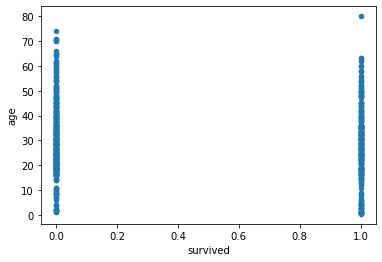

In [20]:
ti.plot(kind='scatter', y='age', x='survived')

The following code replaces the `survived` column with the `survived` column converted to bool:

In [23]:
ti['survived'] = ti['survived'].astype(bool)

In [26]:
ti.dtypes

survived          bool
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

## How do summarize data with pandas?

Summary of continous (real-valued) columns:

In [24]:
ti.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Summary of categorical columns is not as easy....

In [11]:
ti.describe(include = ['object', 'bool'])

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,889,891,891,891,203,889,891,891
unique,2,3,3,3,2,7,3,2,2
top,male,S,Third,man,True,C,Southampton,no,True
freq,577,644,491,537,537,59,644,549,537


In [27]:
ti['sex'].value_counts()


male      577
female    314
Name: sex, dtype: int64

In [28]:
ti['class'].value_counts()


Third     491
First     216
Second    184
Name: class, dtype: int64

## Aside: How do I select columns by type?

The categorical columns are `object` (multi-class) and `bool` (binary):

In [27]:
ti.select_dtypes(['object', 'bool']) #dtype == data type, object = unprocessed value


,survived,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,male,S,Third,man,True,NaN,Southampton,no,False
1,True,female,C,First,woman,False,C,Cherbourg,yes,False
2,True,female,S,Third,woman,False,NaN,Southampton,yes,True
3,True,female,S,First,woman,False,C,Southampton,yes,False
4,False,male,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...
886,False,male,S,Second,man,True,NaN,Southampton,no,True
887,True,female,S,First,woman,False,B,Southampton,yes,True
888,False,female,S,Third,woman,False,NaN,Southampton,no,False
889,True,male,C,First,man,True,C,Cherbourg,yes,True


## How many rows and columns are there?

Rows...

In [29]:
len(ti)


891

Rows & columns...

In [30]:
ti.shape # (rows, columns)


(891, 15)

## How do I determine if there is missing data?

In [31]:
ti = pd.read_csv('datasets/titanic.csv')


We run `.isna` (is not-available) across every entry:

In [32]:
ti.isna()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Then we sum down the columns, treating `True` as `1` (and `False` as `0`)

In [33]:
ti.isna().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

... and therefore the `.sum` is the count of missing data (ie., `NA` is `True`)

## Aside: What is the problem with missing data?

In [124]:
def predict_survival(fare, age):
    if (fare > 50) or (age <= 12):
        return 1
    else:
        return 0

When dropping rows (, columns) we want to retain *only* those rows that we can use with our analysis.

Eg., consider the function above, we need *both* the `fare` and the `age`, and so, we must only have rows with them *both*.

In the case of the titanic dataset, this means dropping quite a large number of rows. 

#### Aside: The rule above is fairly accurate,

In [122]:
predictions = []
error = 0
for f, a, s in ti[['fare', 'age', 'survived']].values:
    predictions.append( (s, predict_survival(f, a)) )
    
    
    if s != predict_survival(f, a):
        error += 1

In [123]:
1 - error/len(predictions)

0.691358024691358

## How do I remove missing data with pandas?

Remove rows with missing data:  (axis = 0, *means* rows)

In [34]:
ti_wo_rows = ti.dropna(axis=0)

print("We removed: ", len(ti) -  len(ti_wo_rows), "rows")


We removed:  709 rows


<font color="red">This removes 709 rows across **all** columns!</font>

Remove columns with missing data:

In [35]:
ti_wo_col = ti.dropna(axis=1)


In [36]:
print("We removed: ", len(ti) -  len(ti_wo_col), "rows")

# but how many cols removed? let's use .shape attribute, or the info() method


We removed:  0 rows


In [37]:
ti_wo_col.shape


(891, 11)

In [38]:
ti_wo_col.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived      891 non-null int64
pclass        891 non-null int64
sex           891 non-null object
sibsp         891 non-null int64
parch         891 non-null int64
fare          891 non-null float64
class         891 non-null object
who           891 non-null object
adult_male    891 non-null bool
alive         891 non-null object
alone         891 non-null bool
dtypes: bool(2), float64(1), int64(4), object(4)
memory usage: 64.5+ KB


In [39]:
ti.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null object
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null object
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


## Aside: How do I drop a specific column?

Note, that it would have been better to drop the `deck` column before dropping all the other missing rows, as the deck column is mostly empty (and therefore causes a lot of rows to be dropped). 

The `ti.drop(columns=['deck'])` command will drop the named columns. 

## Aside: Alternative strategies for missing data

* rather than dropping rows we could substitue missing entires for:
    * median(, mean,), modes
    * predicted values (eg., via linear regression)

### Exercise (25 min)
* Context:  What improved your chances of survival on the titanic?

#### Part 1: Investigate the observations in the dataset
The goal of this exercise is to expand on your solution to the prior one, including additional statistical information and information on missing data. 


* load the titanic dataset using `read_csv`
* with `ti`, produce a report which shows interesting columns, samples, and descriptive stats
* HINT, use the following:
    * `df['age'].mean()`
    * `.info()`, `.sample()`, `.mean()`, `.std()`, `.median()`, `.head()`, `.describe()`
* include in the report *whether* there is missing data
    * HINT: `.isna().sum()`
    

#### Part 2: Prepare the dataset for analysis
* define `clean = ti.dropna()` to remove missing data
    * remove the *rows*
* perform the analysis above
    * compare and contrast
* what results are different, and why?
    * ie., how has removing data affected the results?  
* does cleaning the data bias the analysis?
    * if so, do you have any ideas for how to over come that?
    
* EXTRA:
    * What happens if you drop `deck` before `dropna()`.. does this show as much statistical biasing?